In [1]:
import matplotlib.pyplot as plt
import pandas as pd


# folder date
    | 
    test1
    |
    test2
        |
        Golang
        |
        python
            |
            mergesort
            |
            quicksort
                    |
                    timmings
                    | 
                    dtlb-1.csv
                    |
                    dtlb-2.csv
                    |
                    dtlb-..csv
                    |
                    dtlb-base.csv
                    |
                    caceh-1.csv

                    

        

In [3]:
test_folder_names = ["test_test"]

test_languages = ["Golang","Python","C_plus_plus"]

test_algorithm = ["Mergesort"]#,"Quicksort"]

test_data_types = ["dtlb"]#,"cache misses","timeings"]


# Read and make avarage in each 

    Golang
1      5.0
2     10.0
3     25.0
4     20.0
24    45.0
48    20.0
    Python
1      6.0
2     16.0
3     71.5
4      6.0
24    37.0
48    17.5
    C_plus_plus
1           5.0
2          10.0
3          25.0
4          20.0
24         45.0
48         20.0


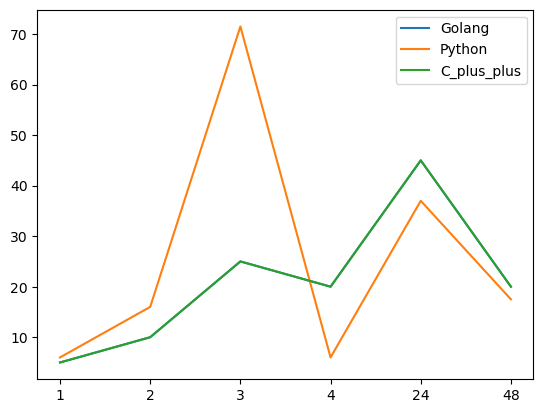

In [6]:


for folder in test_folder_names:
    for data_type in test_data_types:
        for i in range(1,2): #  for i in range(1,5):
            asd = pd.DataFrame()
            id = 0
            for language in test_languages:
                
                for algorithm in test_algorithm:
                    temp = []
                    
                    for testnum in range(1,3):#for testnum in range(1,9):#
                        base_path = "../{}/base/{}/{}/{}-base.csv".format(folder, language,algorithm, data_type)
                        base_file = pd.read_csv(base_path)
                        
                        path = "../{}/test{}/{}/{}/{}-{}.csv".format(folder, testnum, language,algorithm, data_type,i)
                        file = pd.read_csv(path)
                        temp.append(file.sub(base_file))
                            
                            
                    df = pd.concat(temp, ignore_index=True)
                    mean_values = df.mean()

                    # Convert mean_values to a DataFrame
                    mean_df = pd.DataFrame(mean_values, columns=[language])
                    print(mean_df)
                    # Display the new DataFrame
                    asd.insert(id,language, mean_df)
                    id += 1
            asd.plot()
            plt.show()
          
                    
